# --------Making Linear Regression Model Code------

#      =========We will use Pandas, Numpy===========

In [7]:
#          ========= Developed by Mahesh Patel ==================

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(10)

In [47]:
# Importing the data for linear regression
data = pd.read_csv('datasets//TaxiFareActualsData.csv', sep =',')

In [48]:
# check the shape of data
data.shape

(24, 2)

In [49]:
data.head()

,Distance,Fare
0,0.4,70
1,7.2,210
2,1.8,110
3,3.6,150
4,4.4,150


Text(0, 0.5, 'Fare')

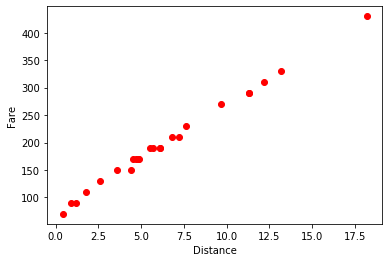

In [50]:
# lets draw our data
plt.scatter(data.Distance, data.Fare, color ="red")
plt.xlabel("Distance")
plt.ylabel("Fare")

### Will start with defination of line

### y = mx+c

In [51]:
def linear_model_mps(x,m=11,c=11):
    y = m*x+c
    return y

In [52]:
def comparing_out_value(original_y, calculated_y):
    return((original_y == calculated_y))

In [53]:
# divide data into train and test
train_x, test_x, train_y, test_y = data.iloc[0:16,0], data.iloc[16:,0], data.iloc[0:16,1], data.iloc[16:,1]

In [86]:
def absolute_error(original_y, calculated_y):
    """
    1.this is a function that calculates absolute difference and then sums
    2. it to give error value
    2.example :
    arrays1 = [1,2]
    arrays1 = [2,3]
    abs = abs(-1)+abs(1) =2
    """
    abs_err = np.sum(np.absolute(original_y- calculated_y))
    #print("abs_err", abs_err)
    return abs_err

In [87]:
#absolute_error()

In [88]:
def SSE(original_y, calculated_y):
    """
    1.this gives sum of sqaured error and those are pretty big 
    2.this helps take care of outliers because those outliers will give big values
    and our model tries to reduce those value
    3.this shows square of the amount of total error of all data points
    """
    sse = np.sum((np.absolute(original_y- calculated_y))**2)
    return sse

In [102]:
def RMSE(original_y, calculated_y):
    """
    1.this gives root of mean of sum of sqaured error and those are pretty big 
    2.this helps take care of outliers because those outliers will give big values
    and our model tries to reduce those value
    3. this is error per data point
    """
    #print(len(original_y))
    sse = np.sum(((np.absolute(original_y- calculated_y))**2)/len(original_y))
    return np.sqrt(sse)

In [105]:
slope =1
intercept =2
no_of_iterations =100
errors =[]
for i in range(no_of_iterations):
    slope =random.randint(0,100)
    intercept =random.randint(0,100)
    y_cal = linear_model_mps(train_x, slope,intercept)
    #print(y_cal)
    res_abs = absolute_error(train_y, y_cal)
    res_sse = SSE(train_y, y_cal)
    res_rmse = RMSE(train_y, y_cal)
    errors.append([res_abs,res_sse,res_rmse])
    #result_freq = res.value_counts()
    print("abs_error",res_abs, ", sse_error",res_sse, ", rmse_error",res_rmse)
    

abs_error 5653.299999999999 , sse_error 3060865.0899999994 , rmse_error 437.3832051245223
abs_error 1194.1 , sse_error 117324.60999999997 , rmse_error 85.631700467759
abs_error 7193.900000000001 , sse_error 4881315.010000001 , rmse_error 552.3424554793883
abs_error 1665.7 , sse_error 314363.41000000003 , rmse_error 140.17030043843098
abs_error 4299.799999999999 , sse_error 1734871.2399999998 , rmse_error 329.28627742437124
abs_error 5316.0 , sse_error 2922736.0 , rmse_error 427.40028076733876
abs_error 3440.0 , sse_error 1252600.0 , rmse_error 279.79903502335384
abs_error 2519.2 , sse_error 655915.8399999999 , rmse_error 202.47157825235618
abs_error 3853.1 , sse_error 1427960.4100000001 , rmse_error 298.7432436474506
abs_error 980.2999999999998 , sse_error 75305.29 , rmse_error 68.60452335670003
abs_error 5685.299999999999 , sse_error 3083542.29 , rmse_error 439.00044775034115
abs_error 6463.299999999999 , sse_error 4316311.289999999 , rmse_error 519.3933534663299
abs_error 611.0999999

array([ 1,  4,  9, 16], dtype=int32)